In [67]:
import ROOT

## Plot Formatting Examples

In [62]:
f = ROOT.TFile("out/pippi0_fall2018_in_pass1/nSidis_005032.root")
f.ls()

TFile**		out/pippi0_fall2018_in_pass1/nSidis_005032.root	
 TFile*		out/pippi0_fall2018_in_pass1/nSidis_005032.root	
  KEY: TTree	EventTree;2	EventTree [current cycle]
  KEY: TTree	EventTree;1	EventTree [backup cycle]
  KEY: TTree	pippi0;1	Tree


In [63]:
t = f.Get("EventTree")
[b.GetName() for b in t.GetListOfBranches()]

['A',
 'evnum',
 'uID',
 'run',
 'Pol',
 'tPol',
 'hwp',
 'target',
 'tSign',
 'Nmax',
 'x',
 'y',
 'W',
 'Q2',
 'nu',
 'truex',
 'truey',
 'trueQ2',
 'trueW',
 'truenu',
 'hel',
 'truex',
 'truey',
 'trueW',
 'truenu',
 'pindex',
 'status',
 'px',
 'py',
 'pz',
 'p',
 'E',
 'pid',
 'vx',
 'vy',
 'vz',
 'chi2',
 'beta',
 'm',
 'theta',
 'eta',
 'phi',
 'truepx',
 'truepy',
 'truepz',
 'truep',
 'truept',
 'truem',
 'truetheta',
 'trueeta',
 'truephi',
 'truevx',
 'truevy',
 'truevz',
 'trueE',
 'is_CFR',
 'truepid',
 'trueparentid',
 'trueparentpid',
 'trueparentparentid',
 'trueparentparentpid',
 'pcal_sector',
 'pcal_e',
 'pcal_x',
 'pcal_y',
 'pcal_z',
 'pcal_lu',
 'pcal_lv',
 'pcal_lw',
 'pcal_m2u',
 'pcal_m2v',
 'pcal_m2w',
 'ecin_sector',
 'ecin_e',
 'ecin_x',
 'ecin_y',
 'ecin_z',
 'ecin_lu',
 'ecin_lv',
 'ecin_lw',
 'ecin_m2u',
 'ecin_m2v',
 'ecin_m2w',
 'ecout_sector',
 'ecout_e',
 'ecout_x',
 'ecout_y',
 'ecout_z',
 'ecout_lu',
 'ecout_lv',
 'ecout_lw',
 'ecout_m2u',
 'ecout_

In [16]:
t.GetEntries()

45244

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


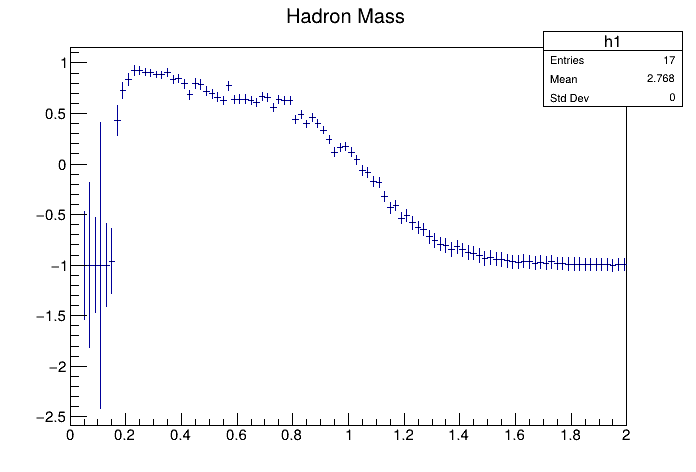

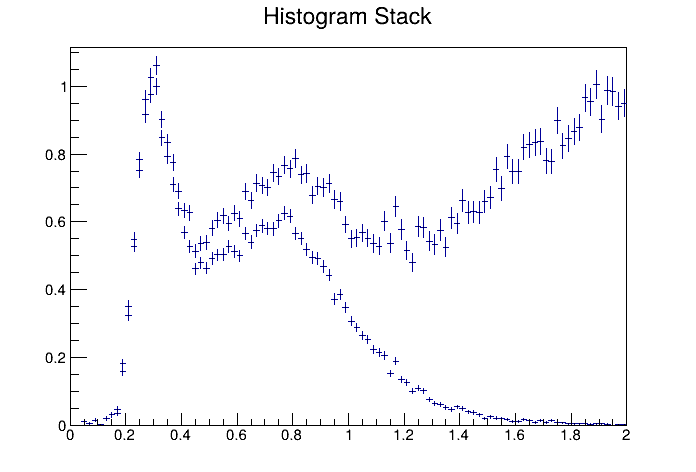

In [185]:
c1 = ROOT.TCanvas()


h1 = ROOT.TH1F("h1","Hadron Mass",100,0,2)
h2 = ROOT.TH1F("h2", "Missing Mass",100,0,2)
for entry in t:
    h1.Fill(entry.Mh)
    h2.Fill(entry.Mx)

h1.Scale(1/h1.GetMaximum())
h2.Scale(1/h2.GetMaximum())

h3 = ROOT.TH1F()
h3 = (h1-h2)/(h1+h2)
#h1.Add(h2)

#h1.Draw("h1")
#h2.Draw("same")
h3.Draw()
c1.Draw()

c2 = ROOT.TCanvas()
hstack = ROOT.THStack("hstack","Histogram Stack")
hstack.Add(h1)
hstack.Add(h2)
#hstack.SetFillColor(ROOT.kGreen) #color-opacity
hstack.Draw()
c2.Draw("nostack")



In [73]:
print(ROOT.TColor.GetColorByName("red"))

2


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      373.685
NDf                       =           12
Edm                       =  2.58989e-06
NCalls                    =           61
Constant                  =      639.816   +/-   11.3716     
Mean                      =     0.131161   +/-   0.00022677  
Sigma                     =    0.0142558   +/-   0.000208698  	 (limited)


Warning in <TFile::Append>: Replacing existing TH1: hformat (Potential memory leak).


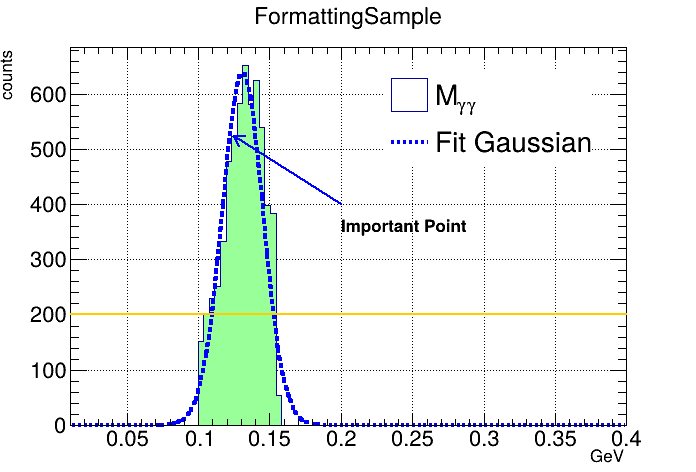

In [163]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

fit = ROOT.TF1("fit","gaus",0.1,155) #"name","fit_type",min,max
fit.SetLineWidth(4)
fit.SetLineColor(ROOT.kBlue)
fit.SetLineStyle(2)

hformat=ROOT.TH1F("hformat","FormattingSample;GeV;counts",100,0.01,0.4) #"name","title;xaxis;yaxis",bin number,min,max
hformat.SetStats(0)
hformat.SetFillColor(ROOT.kGreen-9) #color-opacity
hformat.GetXaxis().SetTitleSize(0.04)
hformat.GetYaxis().SetTitleSize(0.04)
hformat.GetXaxis().SetLabelSize(0.05)
hformat.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"M_{#gamma#gamma}","f") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(fit,"Fit Gaussian","l")
leg.SetBorderSize(0)

line=ROOT.TLine(0.01,200,0.4,200) #xmin,ymin,xmax,ymax)
line.SetLineWidth(2)
line.SetLineColor(ROOT.kOrange)

text=ROOT.TLatex(0.2,350,"Important Point")
text.SetTextSize(0.04)


#t.Draw("Mdiphoton>>h")
t.Fit("fit","Mdiphoton>>hformat","Mdiphoton>0.1&&Mdiphoton<0.155")

x0=0.125
index=hformat.FindBin(x0)
y0=hformat.GetBinContent(index)
arrow=ROOT.TArrow(0.2,400,x0,y0)
arrow.SetLineWidth(2)
arrow.SetArrowSize(0.02)
arrow.SetLineColor(ROOT.kBlue)

leg.Draw()
line.Draw()
arrow.Draw()
text.Draw()
c.Draw()

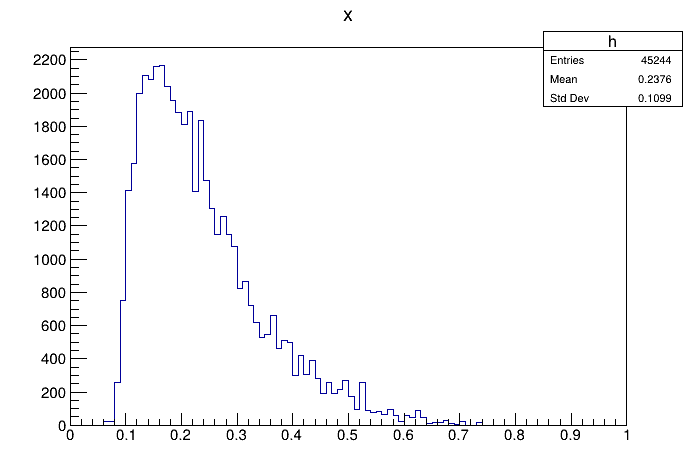

In [147]:
c = ROOT.TCanvas()
t.Draw("x>>h(100,0,1)")
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2D (Potential memory leak).


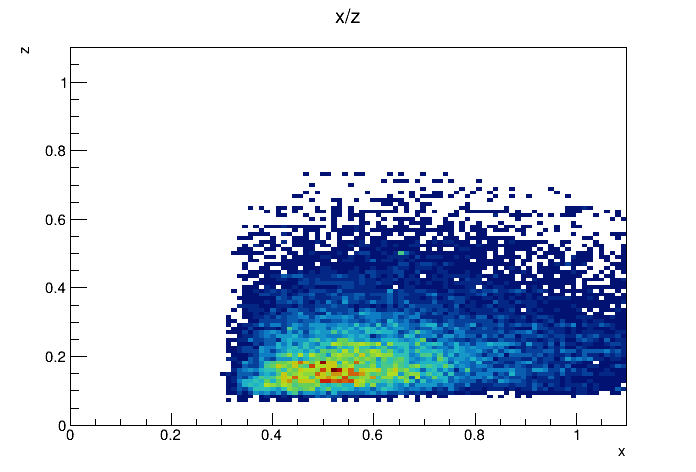

In [158]:
c = ROOT.TCanvas()
h2D = ROOT.TH2F("h2D","x/z;x;z",100,0,1.1,100,0,1.1)#xbins,xmin,xmax,ybins,ymin,ymax
h2D.SetStats(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
t.Draw("x:z>>h2D")
c.Draw()

#### Formatting Template

In [5]:
f = ROOT.TFile("out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root")
f.ls()

TFile**		out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root	
 TFile*		out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root	
  KEY: TTree	EventTree;1	EventTree
  KEY: TTree	pippi0;1	Tree


In [12]:
tFin = f.Get("pippi0")
[b.GetName() for b in tFin.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true']

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


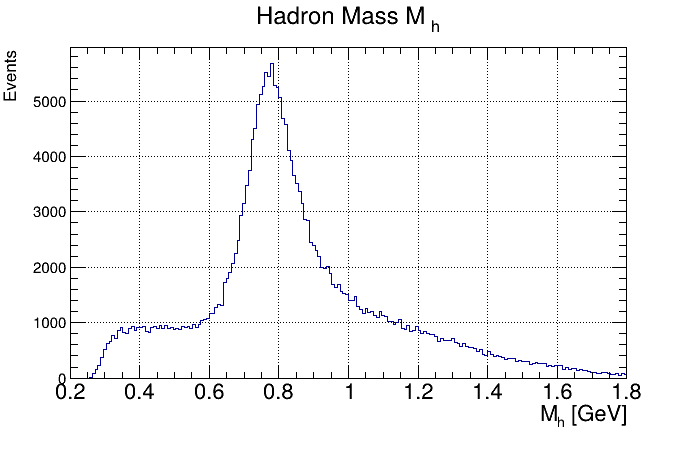

In [33]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

ROOT.gPad.SetBottomMargin(0.2)


tFin.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

## Chaining all RGA data

In [3]:
import os

def list_root_files(directory):
    root_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.root'):
            root_files.append(filename)
    return root_files


In [4]:
base = ["pippi0_fall2018_in_pass1","pippi0_fall2018_out_pass1","pippi0_spring2019_in_pass1"]

In [5]:
chain = ROOT.TChain("pippi0")

for file in base:
    chain.Add(os.path.join("out",file,file+".root"))


In [6]:
[b.GetName() for b in chain.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true']

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


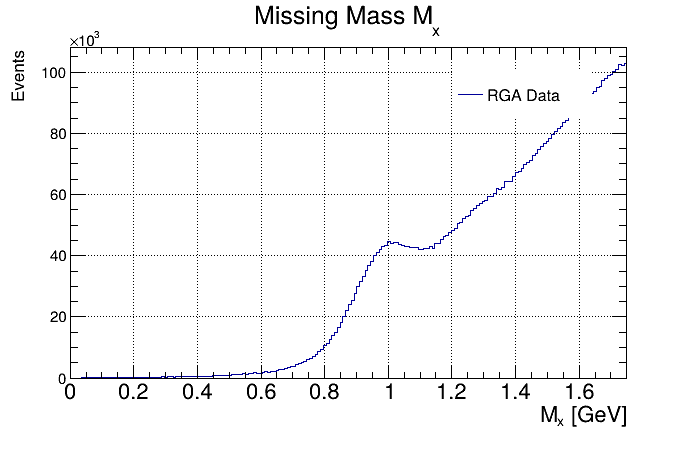

In [51]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Missing Mass M_{x};M_{x} [GeV];Events",200,0,1.75)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)

chain.Draw("Mx>>h","Mdiphoton<0.16 && 0.115<Mdiphoton","")
leg.Draw()
c.Draw()

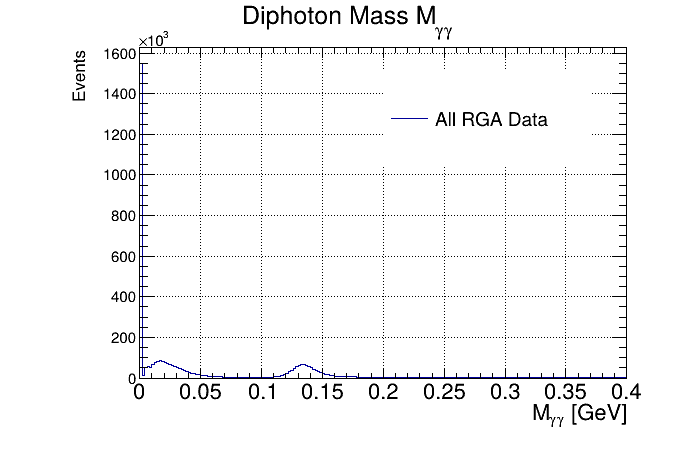

In [7]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Diphoton Mass M_{#gamma#gamma};M_{#gamma#gamma} [GeV];Events",200,0,0.4)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"All RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Mdiphoton>>h","0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


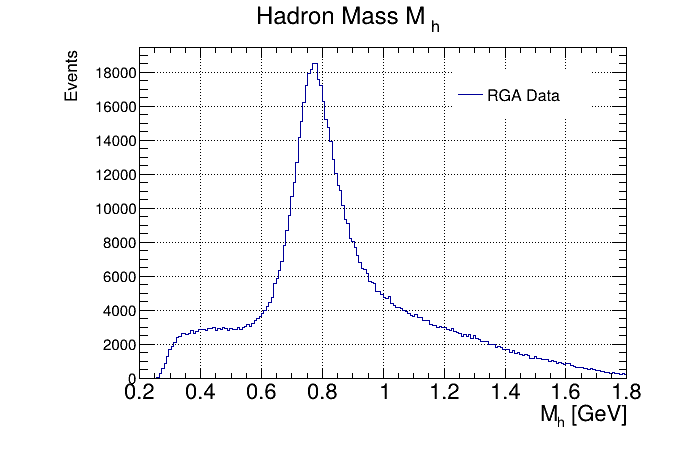

In [58]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


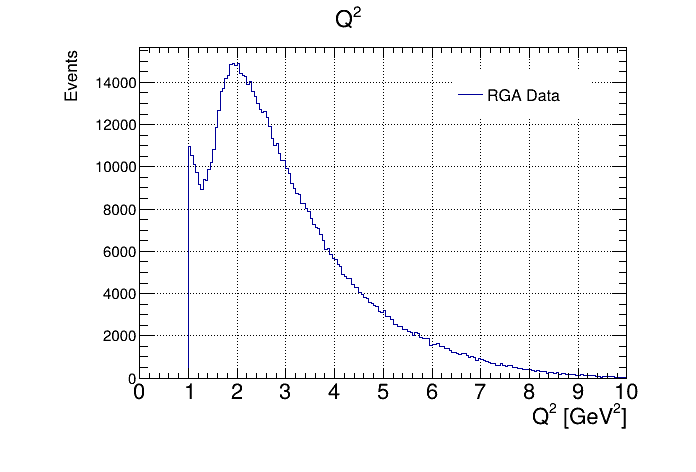

In [8]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Q^{2};Q^{2} [GeV^{2}];Events",200,0,10)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Q2>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


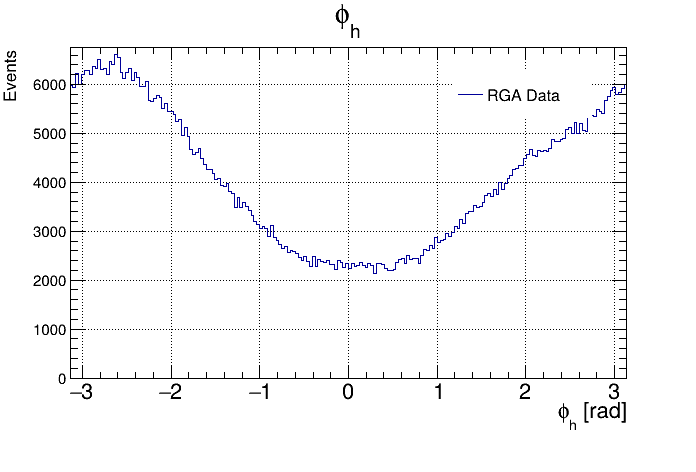

In [62]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","#phi_{h};#phi_{h} [rad];Events",200,-3.14,3.14)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetYaxis().SetRangeUser(0,6750)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)

chain.Draw("phi>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


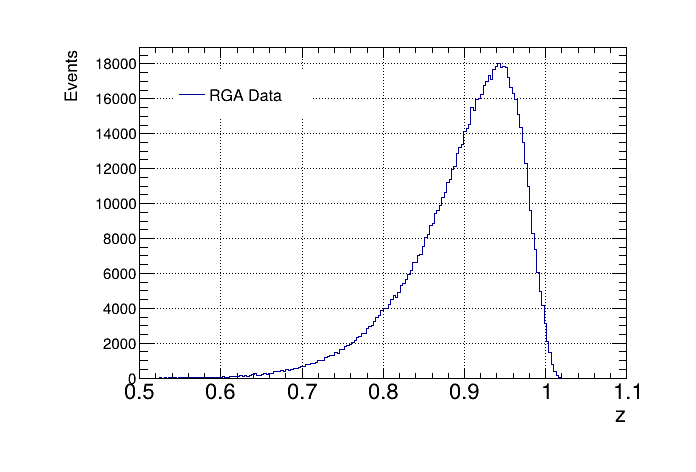

In [16]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h",";z;Events",200,0.5,1.1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.25,0.75,0.45,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("z>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


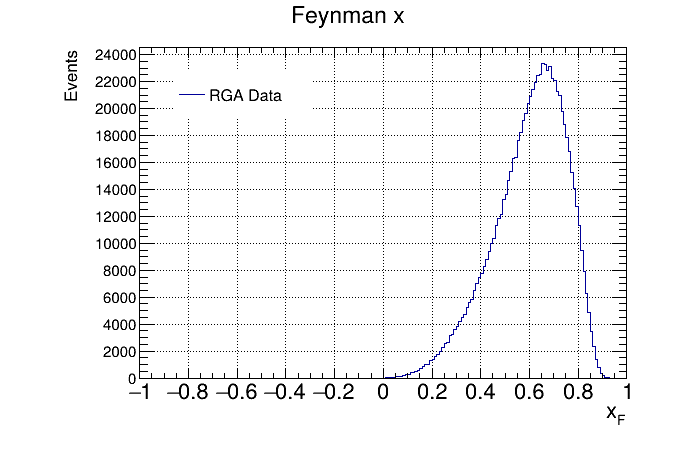

In [15]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Feynman x;x_{F};Events",200,-1,1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.25,0.75,0.45,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("xF>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


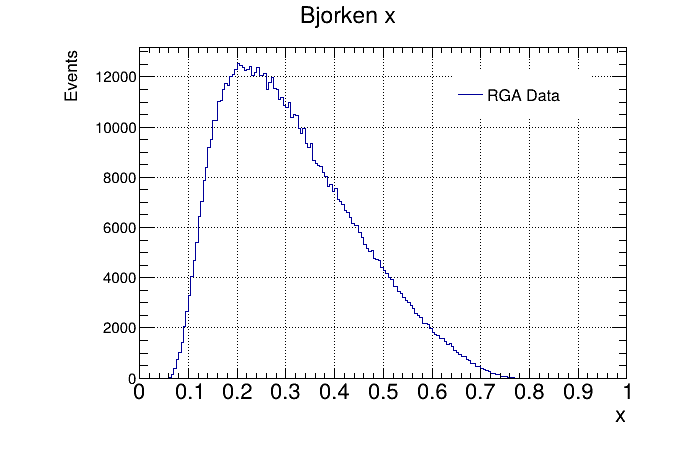

In [66]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Bjorken x;x;Events",200,0,1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("x>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

## Comparing IN/OUT bending

In [68]:
f_in = ROOT.TFile("out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root")
f_out = ROOT.TFile("out/pippi0_fall2018_out_pass1/pippi0_fall2018_out_pass1.root")

In [69]:
t_in = f_in.Get("EventTree")
t_out = f_out.Get("EventTree")

h_in entries: 242260.0
h_out entries: 311400.0


Warning in <TFile::Append>: Replacing existing TH1: h_in (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_out (Potential memory leak).


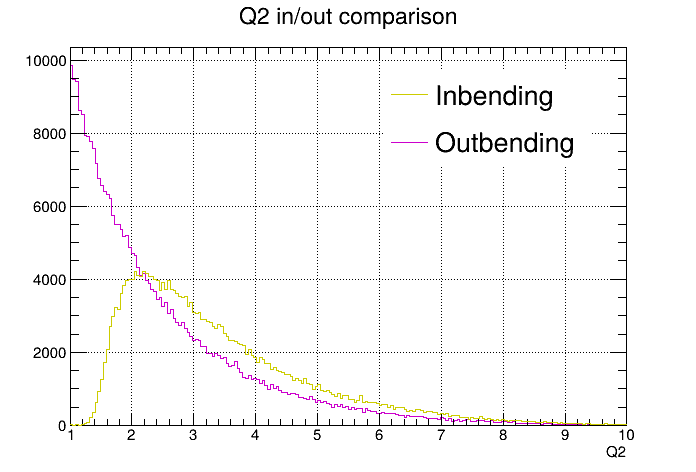

In [59]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h_in = ROOT.TH1F("h_in", "h_in",200,1,10)
h_in.SetStats(0)
h_in.SetLineColor(ROOT.kGreen-15) #color-opacity


h_out = ROOT.TH1F("h_out", "Q2 in/out comparison;",200,1,10)
h_out.SetLineColor(ROOT.kRed-15) #color-opacity
h_out.SetStats(0)

#max_y = max(h_in.GetMaximum(), h_out.GetMaximum())
#h_in.SetMaximum(1.1 * max_y)
#_out.SetMaximum(1.1 * max_y)


t_in.Project("h_in","Q2","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
t_out.Project("h_out","Q2","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
print("h_in entries:",h_in.GetEntries())
print("h_out entries:", h_out.GetEntries())

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h_in,"Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(h_out,"Outbending","l")
leg.SetBorderSize(0)

h_out.Draw("h_out")
h_in.Draw("same")


leg.Draw()
#t_in.Draw("Q2>>h_in","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
#t_out.Draw("Q2>>h_out","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

h_in entries: 230681768.0
h_out entries: 220528864.0


Warning in <TFile::Append>: Replacing existing TH1: h_in (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_out (Potential memory leak).


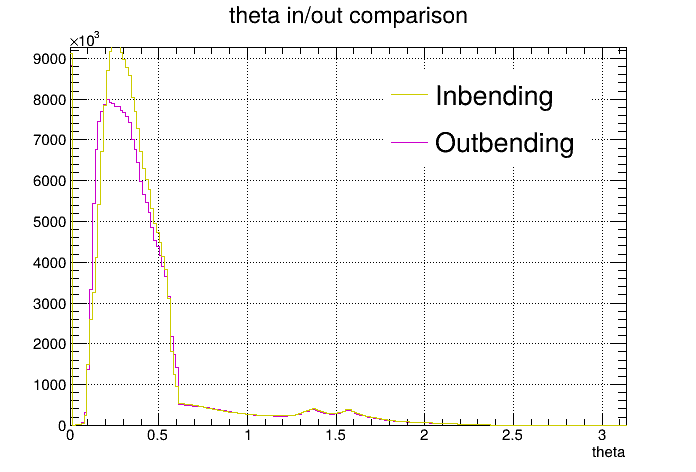

In [74]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h_in = ROOT.TH1F("h_in", "h_in",200,0,3.14)
h_in.SetStats(0)
h_in.SetLineColor(ROOT.kGreen-15) #color-opacity


h_out = ROOT.TH1F("h_out", "theta in/out comparison;theta",200,0,3.14)
h_out.SetLineColor(ROOT.kRed-15) #color-opacity
h_out.SetStats(0)

#max_y = max(h_in.GetMaximum(), h_out.GetMaximum())
#h_in.SetMaximum(1.1 * max_y)
#_out.SetMaximum(1.1 * max_y)


t_in.Project("h_in","theta")#,"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
t_out.Project("h_out","theta")#,"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
print("h_in entries:",h_in.GetEntries())
print("h_out entries:", h_out.GetEntries())

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h_in,"Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(h_out,"Outbending","l")
leg.SetBorderSize(0)

h_out.Draw("h_out")
h_in.Draw("same")


leg.Draw()
#t_in.Draw("Q2>>h_in","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
#t_out.Draw("Q2>>h_out","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

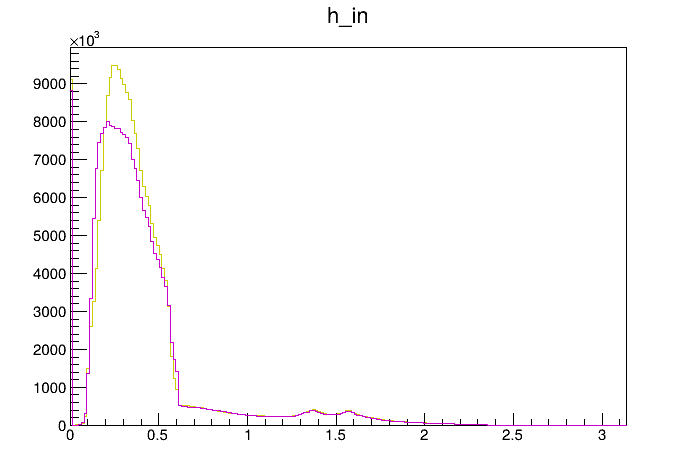

In [75]:

c = ROOT.TCanvas()
h_in.Draw("h_in")
h_out.Draw("same")
c.Draw()